# Unsupervised Learning

## Introduction
* Unsupervised learning is a sub-field of machine learning in which patterns are learnt from datasets consisting of samples without labels, i.e. there exist only features $(x_1,x_2,\dots,x_n)$ but no target variables in the given dataset
* No notion of dependent and independent variables
* It is useful for understanding the distribution of data or patterns in data and extracting valuable information from it
* These USL tasks include:
    - clustering
    - dimensionality reduction
    - anomaly/outlier detection
    - association rule mining

#### Clustering
* Finding Homogenous subgroups within the data such that data points within a subgroup are similar.
* Subgroups are referred to as clusters
* Similarity is decided based on some similarity measure
* Gives an intuition about the structure and distribution of data
* Useful in many applications where data points are to be grouped without any target labels
---
![](clus.png)

#### Dimensionality Reduction
* Mapping features in a higher dimensional space to a lower dimensional space with minimal loss in information
* Principal Component Analysis (PCA) and autoencoders are unsupervised learning techniques used for dimensionality reduction
* Useful in data compression and feature extraction
---
![](dimred1.jpg)
___
![](dimred3.png)


#### Anomaly/Outlier Detection
* Finding unusual or unexpected data points in the dataset that differ from the rest
* Anomalies occur rarely in data but detecting them is important
* Works under the assumption that features of an outlier or anomaly are significantly different from normal points
* Anomaly or outlier detection in time series data is another important area of study
---
![](tsano.png)

#### Associate Rule Mining
* Unsupervised learning task for discovering relations (rules) between different variables in a dataset
* Given a set of transactions, these rules predict the occurence of an item in the transaction based on occurence of other items in the transaction
* More suitable for non-numeric, categorical data
![](rulemin.jpg)

## Applications of USL
1. Medical:
    - Categorizing people into different groups based on different healthcare parameters and medical images
    - Based on the common conditions or diseases that a group of people may possess, certain conclusions about the condition or disease can be made
    - Association rule mining can also be used to form rules between symptoms and diseases which help doctors in diagnosis
2. Engineering:
    - Detecting faults (anomaly) in manufacturing or a process industry
    - Sudden changes in process parameters such as temperature, pressure, power, vibration, etc can be monitered and analysed using unsupervised learning techniques
3. Search Engines
    - Grouping together search results based on a search phrase involves unsupervised learning
    - Google news uses unsupervised learning to categorize articles on the same story from various online news outlets
4. Image Grouping
    - Grouping of pictures in a smart phone or in a social media account
    - pictures with identical features are grouped together
    - Generally, autoencoders are used for this purpose
5. Market-based analysis
    - Intelligent recommendations to consumers based on association rule mining
    - Data collected from supermarkets or e-commerce websites is mined for finding the associations between products which are frequently bought together

## Clustering
* Finding clusters within the data such that data points within a cluster are similar
* But how do we define 'similarity'?
    - Distance between the points?
    - Density of points
    - Probability of belonging to a distribution

### Types of Clustering algorithms
* Clustering algorithms can be categorized as follows based on the similarity metric used to cluster data:
    - Distance Based metric:
        * Centroid based clustering
        * Hierarchial clustering
    - Density based metric:
        * Density based clustering
    - Probability based metric:
        * Distribution based clustering

### Centroid Based Clustering
* INTUITION: There is a centroid/center for the cluster and all the points in the cluster are at a close distance to the centroid
* In these algorithms, the number of clusters is decided apriori- a drawback, as we need to know the number of clusters beforehand

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.random((150,2))*10

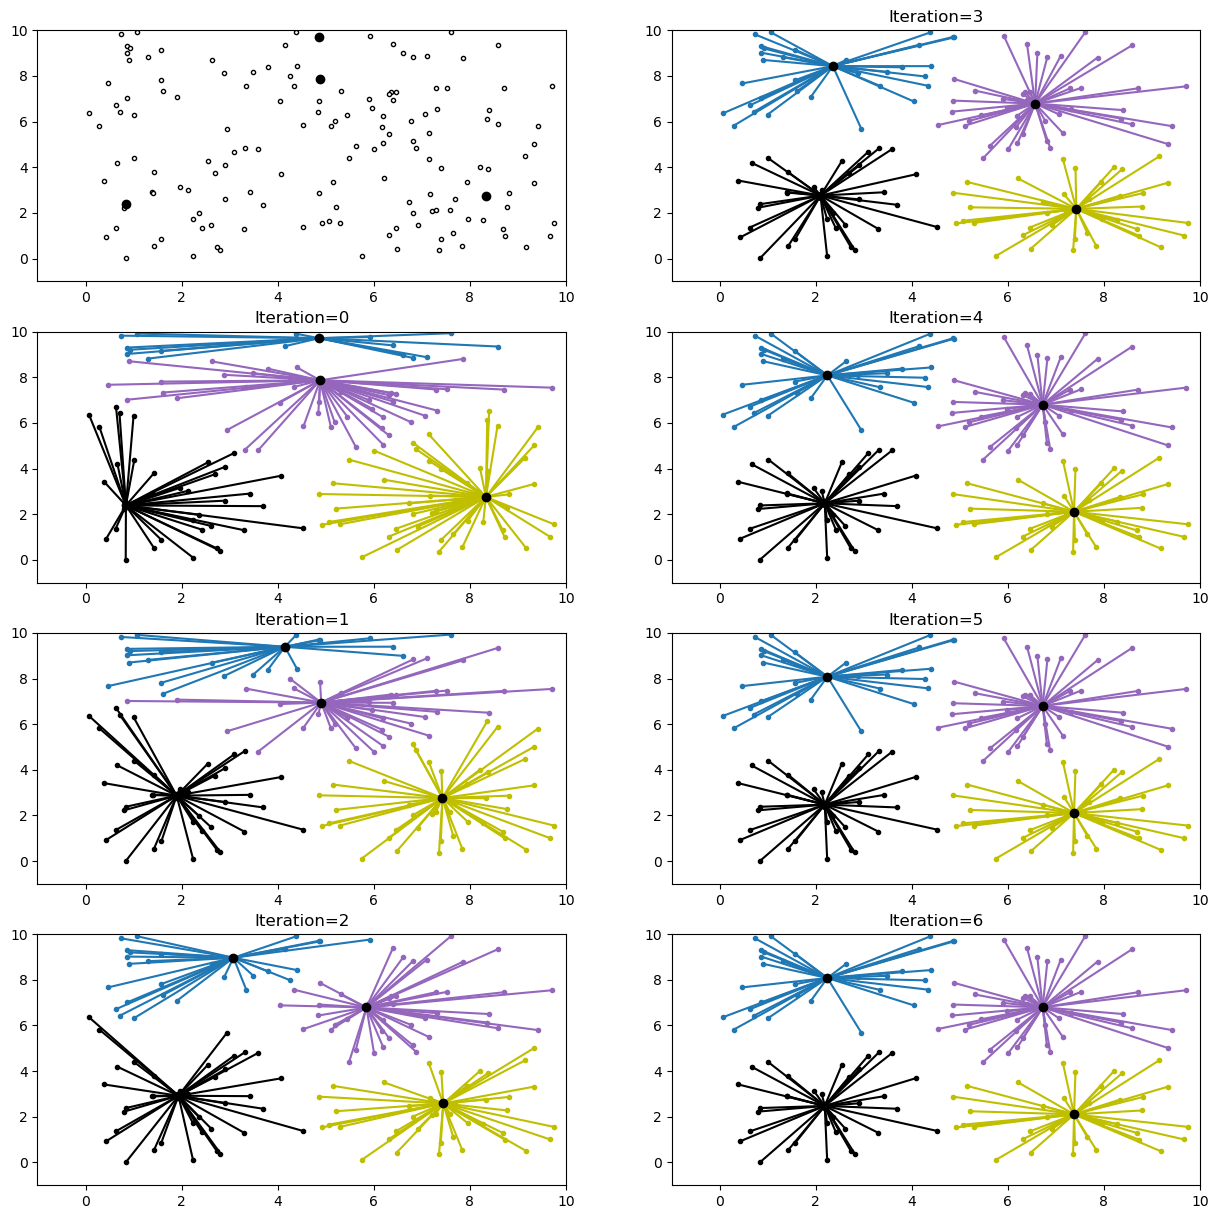

In [10]:
fig,axs = plt.subplots(4,2,figsize=(15,15))

#data initialization
k = 4

ridx = np.random.choice(len(data),k,replace=False)#choose k random points as centroids
centroids = data[ridx,:]

#plotting initial data
axs[0,0].plot(centroids[:,0],centroids[:,1],marker='o',color='k',ls='')
axs[0,0].scatter(data[:,0],data[:,1],c='w',marker='.',edgecolor='k')
axs[0,0].set(xlim=(-1,10),ylim=(-1,10))

x,y = 1,0
color={0:'C0',1:'y',2:'C4',3:'k',4:'C1',5:'C5'}
for j in range(0,7): 
   
    #calculate the squared euclidean distance using numpy and broadcast operations
    dists = np.zeros((data.shape[0],k))
    for ci in range(k):
            dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
    
    #select the minimum distance from the 3 columns of distances
    groupidx = np.argmin(dists,axis=1)
    
    #plotting the new classes
    for i in range(len(data)):
        axs[x,y].plot((data[i][0],centroids[groupidx[i]][0]),(data[i][1],centroids[groupidx[i]][1]),marker='.',color=color[groupidx[i]])
    axs[x,y].plot(centroids[:,0],centroids[:,1],marker='o',color='k',ls='')
    axs[x,y].set_title(f'Iteration={j}') 
    axs[x,y].set(xlim=(-1,10),ylim=(-1,10))
    #calculate the new centroids
    for ki in range(k):
        centroids[ki,:] = [np.mean(data[groupidx==ki,0]),np.mean(data[groupidx == ki,1])]
        
    y+=x//3
    x=(x+1)%4
                           
    
plt.show()

### Hierarchial Clustering
* Typically used when dataset is large
* Constructs a hierarchy among all the datapoints and then based on the hierarchy puts them into different clusters
* If a hierarchy exists, then it is used to cluster data otherwise distance metrics can be used to cluster data hierarchially
* No need to choose the number of clusters apriori
* Two approaches:
    - Bottom Up- Agglomerative clustering
    - Top Down - Divisive approach
* Bottom Up approach steps:
    * steps:
        1. Each data point in the dataset is considered a cluster initially
        2. Compute the distance between all clusters (centroids) based on some distance metric
        3. Merge two clusters which are closest to one another
        4. Repeat steps 2 and 3 until desired level of clustering is obtained.
    * Different heuristics can be used to determine when to stop clusters or after desired number of clusters are obtained
* Top Down approach steps:
    * steps:
        1. All the datapoints are in one cluster initially
        2. Partition the cluster into two clusters which are not similar based on a distance metric
        3. Repeat until desired level of clustering is obtained.
    * Exactly opposite to the Bottom-Up approach
---
![](hierclus.png)
___
![](aggclus.png)

## Distance Measures
* Distance Measure is a function which gives the 'distance' between two data points
* If the function returns zero, then the points are equivalent
* If the distance is (relatively) low, then the points can be considered to be similar (the logic goes both ways)
* The most used distance measures are:
    - Euclidean Distance ($L_2$ norm)
    - Manhattan Distance ($L_1$ norm)
    - Cosine similarity ($[-1,1]$)
---
![](dist.png)

#### Manhattan distance
* If we have two data points $A=(x_a,y_a)$ and $B=(x_b,y_b)$ in $\mathbb{R}^2$, then we can measure the $L_1$ norm as:
<p style='text-align:center;'>$L_1(A,B) = \lvert y_{b}-y_{a}\rvert +\lvert x_{b}-x_{a}\rvert$</p>
* Works well if the points are arranged in the form of a grid
* Recommended for high-dimensional data
* *eg* Distance between houses arranged on a grid

#### Euclidean distance
* One of the most popular distance metrics
* If we have two data points $A=(x_a,y_a)$ and $B=(x_b,y_b)$ in $\mathbb{R}^2$, then we can measure the $L_2$ norm as:
<p style='text-align:center;'>$L_2(A,B) = \sqrt{(y_{b}-y_{a})^2 +(x_{b}-x_{a})^2}$</p>
* It gives the geometric distance between two points in the vector space
* Not recommended for higher dimensional data

#### Cosine distance
* Distance is measured in terms of the angle between two feature vectors
If we have two data points $A=(x_a,y_a)$ and $B=(x_b,y_b)$ in $\mathbb{R}^2$, then we can measure the Cosine distance as:
<p style='text-align:center;'>Cosine Distance$ = 1-\frac{A.B}{|A|\times|B|}$</p>

<p style='text-align:center;'>Cosine Similarity$ = \frac{A.B}{|A|\times|B|}$</p>

* Useful when the orientation of the vectors is more important than the distance
* If $\cos(\theta)=1$
    - cosine similarity is one
    - cosine distance is zero (minimum), same vector
* If $\cos(\theta)=0$
    - cosine similarity is zero,
    - cosine distance is one, orthogonal vectors
* If $\cos(\theta)=-1$
    - cosine similarity is $-1$
    - cosine distance is $2$ (maximum), indicating opposite directions

## Density and distribution based clustering
* Distance based methods assume that the clusters are in specific shape (spherical or elliptical)
* Density based methods on the other hand, make no assumptions about the shape of the cluster
* INTUITION: Groups data points with high density into one cluster
* Points not in high density region are not clustered and are considered outlier points
* Useful:
    - When clusters are of varied shapes but are densely populated
    - to separate outliers from the points in dense regions
---
![](dbk.jpg)

#### DBSCAN
* The most popular density based clustering technique
* *eg* To separate high valued customers from a large group of customers based on their purchase patterns
---
![](db.png)

#### Distribution based clustering
* Groups data points based on their likelihood of belonging to the same probability distribution
* Each cluster is assumed to be drawn from a different distribution (different parameters)
* Distribution needs to be assumed -Gaussian, Binomial, etc
* Can only be used when it is known that data comes from well known distributions
* Gaussian mixture model is an example of distribution based clustering algorithm

## K-Means Clustering
* A centroid based clustering technique which uses Euclidean distance as a 'distance' metric
* $N$ data points are clustered into $k, k<N$ clusters
* A data point will belong to the cluster to whose center it is the nearest
* The cneter here is taken as the mean vector of all data points in the cluster

### Step to K-means clustering
1. Select the number of clusters ($k$) into which the data is to be grouped
2. Randomly initialize the centers of each cluster (heuristics can be used) or this initialization can be done multiple times
3. Compute the euclidean distance from each center to each of the datapoints in the dataset
4. Group each data point in the cluster to whose center it is closest
5. After grouping, re-compute the center of each cluster by taking the mean of all data points
6. Repeat the steps 3 to 5 until the cluster centers dont change much

Mathematically speaking, the sum of distances of the data points to the cluster centers are getting minimized
___

An example: Here is our data

|sample | feature X|feature Y|
|-------|----------|---------|
|1|1|1|
|2|1.5|1.5|
|3|1|.5|
|4|.8|1.2|
|5|3.3|3.1|
|6|2.58|3.68|
|7|3.5|2.8|
|8|3|3|

* Step 1: Let $k=2$. Randomly choose two points as the cluster means
|Centroids| Mean X|Mean Y|
|-------|----------|---------|
|Center 1|1|1|
|Center 2|3|3|

* Step 2: Compute the distances and group the closest ones

|sample |distance 1|distance 2|Cluster|
|-------|----------|----------|-------|
|1|0|2.83|1|
|2|.71|2.12|1|
|3|.5|3.20|1|
|4|.28|2.84|1|
|5|3.11|.32|2|
|6|3.11|.80|2|
|7|3.08|.54|2|
|8|2.83|0|2|

* Step 3: Compute the new centers (mean of samples in resp clusters) and repeat step 2
|Centroids| Mean X|Mean Y|
|-------|----------|---------|
|Center 1|1.08|1.05|
|Center 2|3.10|3.14|

* Step 2: If change in mean is negligible or no reassignment, then stop the process

|sample |distance 1|distance 2|Cluster|
|-------|----------|----------|-------|
|1|.09|3|1|
|2|.62|2.29|1|
|3|.56|3.37|1|
|4|.31|3.01|1|
|5|3.02|.21|2|
|6|3.03|.74|2|
|7|3|.53|2|
|8|2.74|.17|2|

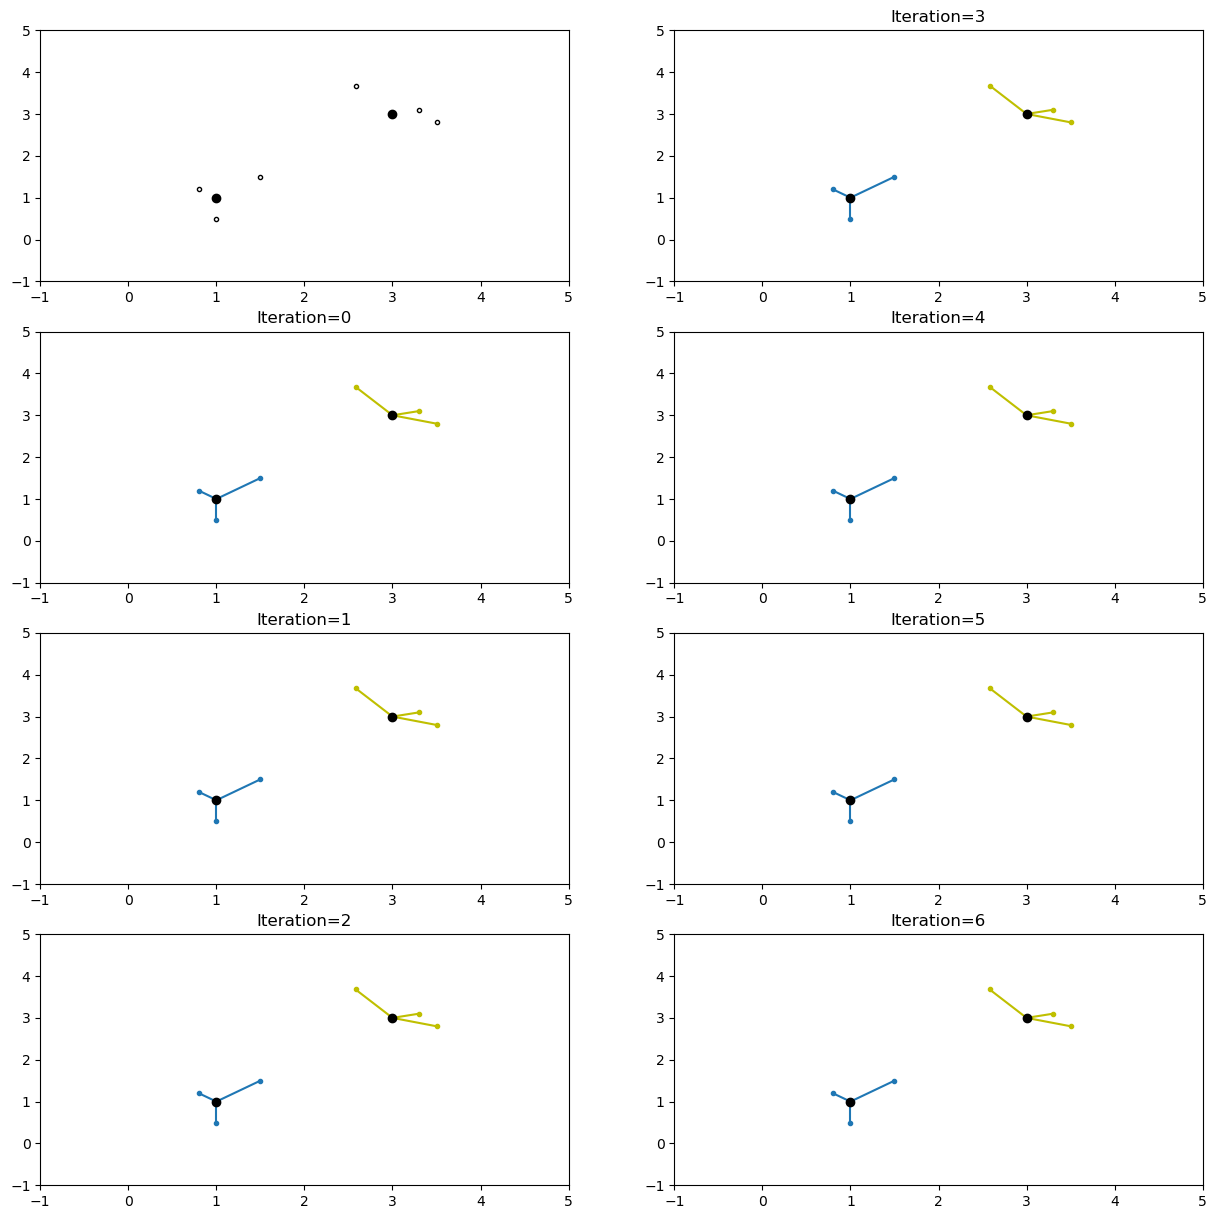

In [15]:
data = np.array([[1,1],[1.5,1.5],[1,.5],[.8,1.2],[3.3,3.1],[2.58,3.68],[3.5,2.8],[3,3]])

fig,axs = plt.subplots(4,2,figsize=(15,15))

#data initialization
k = 2

ridx = np.random.choice(len(data),k,replace=False)#choose k random points as centroids
centroids = np.array([[1,1],[3,3]])

#plotting initial data
axs[0,0].plot(centroids[:,0],centroids[:,1],marker='o',color='k',ls='')
axs[0,0].scatter(data[:,0],data[:,1],c='w',marker='.',edgecolor='k')
axs[0,0].set(xlim=(-1,5),ylim=(-1,5))

x,y = 1,0
color={0:'C0',1:'y',2:'C4',3:'k',4:'C1',5:'C5'}
for j in range(0,7): 
   
    #calculate the squared euclidean distance using numpy and broadcast operations
    dists = np.zeros((data.shape[0],k))
    for ci in range(k):
            dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
    
    #select the minimum distance from the 3 columns of distances
    groupidx = np.argmin(dists,axis=1)
    
    #plotting the new classes
    for i in range(len(data)):
        axs[x,y].plot((data[i][0],centroids[groupidx[i]][0]),(data[i][1],centroids[groupidx[i]][1]),marker='.',color=color[groupidx[i]])
    axs[x,y].plot(centroids[:,0],centroids[:,1],marker='o',color='k',ls='')
    axs[x,y].set_title(f'Iteration={j}') 
    axs[x,y].set(xlim=(-1,5),ylim=(-1,5))
    #calculate the new centroids
    for ki in range(k):
        centroids[ki,:] = [np.mean(data[groupidx==ki,0]),np.mean(data[groupidx == ki,1])]
        
    y+=x//3
    x=(x+1)%4
                           
    
plt.show()

### Determining the number of clusters ($k$)
* The *Elbow method* is generally used to estimate the optimal value of $k$ for $k$-means clustering
* The value of $k$ is varied from say, $[2,10]$
* For each value of $k$, the sum of distances of samples from their centers is computed and plotted
* In the plot, the point where the curve plateaus is an indicator of the optimal number of clusters
---
![](elbow.png)

### Silhouette score
* To evaluate the quality of clusters created using the distance based clustering algorithms
* It measures how well samples are clustered with other samples that are similar
* Following distances are required to calculate silhouette score:
    - Mean distance between data point and all other data points in the same cluster- denoted by $a$
    - Mean distance between a data point and all other data points of the nearest cluster, denoted by $b$
    - Silhouette score $S$ is calculated for each sample using the following formula:
<p style='text-align:center;'>Silhouette Score, $S=\frac{b-a}{max(b,a)}$</p>

* Silhouette score vary from $-1$ to $1$
* A silhouette score close to 1 is considered a 'good' score
* Interpretations based on mean silhouette score of a cluster:
    - Mean silhouette score close to 1: the cluster is dense and well-separated than other clusters
    - Mean silhouette score close to 0: cluster with samples very close to the boundary of the neighbouring clusters
* Negative score for any sample indicates a wrong assignment
---
* Selecting $k$: Mean silhouette scores can be plotted for different values of $k$ to find an optimal value of the $K$ in K-means clustering

---
![](silsco.jpg)
___
![](silsco1.png)

# Summary
* Unsupervised learning involves techniques which extract useful information from unlabelled data
* Clustering, dimensionality reduction, association mining and anomaly detection are well known unsupervised learning tasks
* Many types of clustering exist based on different metrics such as distance, density and probability
* $K$-means clustering is the simplest and most popular among clustering techniques
* $K$-means clustering clusters the data into $k$ clusters based on Euclidean distance of the points to the center of the cluster
* Silhouette scores measures the quality of clusters that are formed for distance based clustering methods